In [314]:
import lightgbm as lgb

In [315]:
import pandas as pd
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [ ]:
threshold = 0.9
theta = 0.5

In [316]:
from sklearn.model_selection import train_test_split


def remove_outliers(data, threshold):
    upper_limit = data.quantile(threshold)
    lower_limit = data.quantile(1 - threshold)

    return data.clip(lower=lower_limit, upper=upper_limit)

for colums in train_data.columns:
    train_data[colums] = remove_outliers(train_data[colums],threshold)

#ターゲットと特徴量の分離
X = train_data.drop(columns=['id'])
X = X.drop(columns=['target'])
y = train_data['target']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)


Training set shape: (800, 12)
Validation set shape: (200, 12)


In [317]:
#feature_names = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
#categorical_features = ['anaemia','diabetes','high_blood_pressure','sex','smoking']
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)

In [318]:
params = {
    'objective': 'binary',  # 二値分類問題
    'metric': 'binary_logloss'  # 損失関数にmulticlassovaを使う
}

In [319]:
gbm = lgb.train(params, lgb_train ,valid_sets=lgb_val)

[LightGBM] [Info] Number of positive: 160, number of negative: 640
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\Ryogi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25512 (\N{CJK UNIFIED IDEOGRAPH-63A8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ryogi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35542 (\N{CJK UNIFIED IDEOGRAPH-8AD6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ryogi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ryogi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


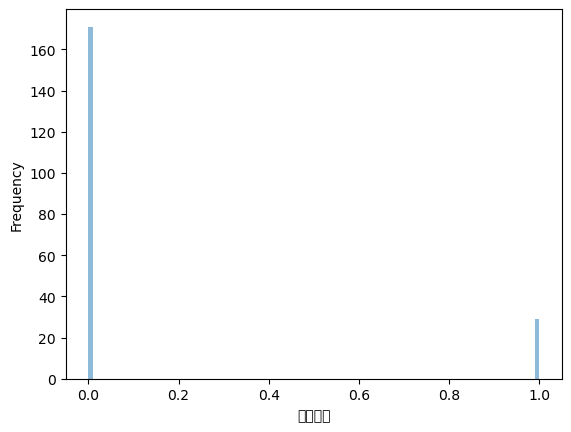

In [320]:
Val_pred = gbm.predict(X_val)
Val_pred_class = [1 if p > theta else 0 for p in Val_pred]
import matplotlib.pyplot as plt

# ヒストグラムを描画
plt.hist(Val_pred_class, bins=100, alpha=0.5, label='Val_pred')

# グラフのタイトルと軸ラベルを設定
plt.xlabel('推論結果')
plt.ylabel('Frequency')

# グラフを表示
plt.show()


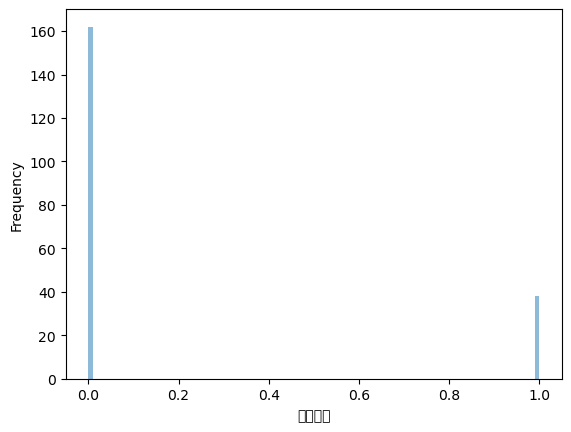

In [321]:
import matplotlib.pyplot as plt

# ヒストグラムを描画
plt.hist(y_val, bins=100, alpha=0.5, label='Val_pred')

# グラフのタイトルと軸ラベルを設定
plt.xlabel('推論結果')
plt.ylabel('Frequency')

# グラフを表示
plt.show()


In [322]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, Val_pred_class)
print(f'Accuracy: {accuracy}')


Accuracy: 0.875


c:\Users\Ryogi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25512 (\N{CJK UNIFIED IDEOGRAPH-63A8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ryogi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35542 (\N{CJK UNIFIED IDEOGRAPH-8AD6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ryogi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ryogi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


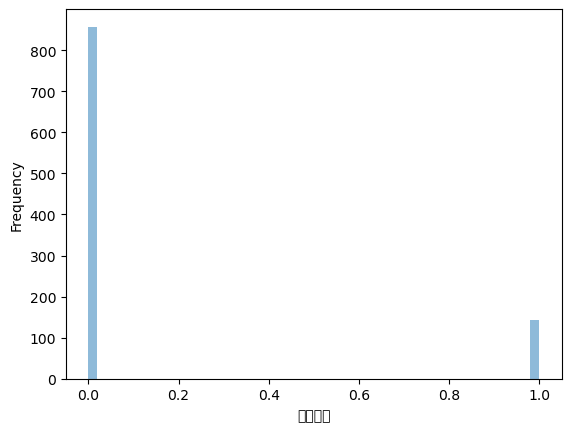

In [323]:
test_data_id = test_data['id']
new_test_data = test_data.drop(columns=['id'])

test_pred = gbm.predict(new_test_data)

Test_pred_class = [1 if p > theta else 0 for p in test_pred]
# ヒストグラムを描画
plt.hist(Test_pred_class, bins=50, alpha=0.5, label='Val_pred')

# グラフのタイトルと軸ラベルを設定
plt.xlabel('推論結果')
plt.ylabel('Frequency')

# グラフを表示
plt.show()


In [324]:
import pandas as pd

# DataFrameを作成
df = pd.DataFrame({
    'cal1': test_data_id,
    'cal2': Test_pred_class
})

# CSVファイルとして保存
df.to_csv('output.csv', index=False, header=False)
submit_data = pd.read_csv('output.csv')
submit_data.head()


,1,0
0,2,1
1,4,0
2,5,0
3,6,0
4,8,0
